# Clustering_PCA

In [1]:
#importando a base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = '../data/customer_nf_drop.csv'
base = pd.read_csv(data)
base.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Years_Since_Enrolled,Age,Age_Group,Mnt_Total,Mnt_Reg,Children,Has_Children,Accepted_Cmp_Total,Has_Accepted_Cmp,Num_Total_Purchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1,0,0,14


In [2]:
#Verificando as informações da base importada
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2205 non-null   object 
 1   Marital_Status        2205 non-null   object 
 2   Income                2205 non-null   float64
 3   Kidhome               2205 non-null   int64  
 4   Teenhome              2205 non-null   int64  
 5   Recency               2205 non-null   int64  
 6   MntWines              2205 non-null   int64  
 7   MntFruits             2205 non-null   int64  
 8   MntMeatProducts       2205 non-null   int64  
 9   MntFishProducts       2205 non-null   int64  
 10  MntSweetProducts      2205 non-null   int64  
 11  MntGoldProds          2205 non-null   int64  
 12  NumDealsPurchases     2205 non-null   int64  
 13  NumWebPurchases       2205 non-null   int64  
 14  NumCatalogPurchases   2205 non-null   int64  
 15  NumStorePurchases    

## Documentação que será utilizada
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#:~:text=Feature%20scaling%20through%20standardization%2C%20also,and%20a%20mean%20of%200.
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

In [3]:
#Seleção das variaveis numericas
numerical_features = base.select_dtypes(include='number').columns
print(numerical_features)
print(len(numerical_features))

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Enrolled',
       'Years_Since_Enrolled', 'Age', 'Mnt_Total', 'Mnt_Reg', 'Children',
       'Has_Children', 'Accepted_Cmp_Total', 'Has_Accepted_Cmp',
       'Num_Total_Purchases'],
      dtype='object')
32


## Separando colunas para o Pré-processamento:
### Numericos:
- MinMaxScaller: Days_Since_Enrolled, Recency
- OneHotEnconder: Kidhome, Teenhome, Accepted's, Complain, Response, Years_Since_Enrolled, Children, Has's
- StandartScaller:Income, Age
- Power Transform:Mnt's, Num's,
### Categoricos:
- OneHotEnconder:Education,Marital_Status,Age_Group

In [4]:
#Organizando as colunas em variaveis.
one_hot_cols = [
    'Education',
    'Marital_Status',
    'Age_Group',
    'Kidhome',
    'Teenhome',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Accepted_Cmp_Total',
    'Has_Accepted_Cmp',
    'Complain',
    'Response',
    'Years_Since_Enrolled',
    'Children',
    'Has_Children'
]
standart_cols=[
    'Income',
    'Age'
]
power_cols = base.columns[
    base.columns.str.startswith('Mnt') | base.columns.str.startswith('Num')
].tolist()

MinMax_cols=[
    'Days_Since_Enrolled',
    'Recency'
]

In [5]:
#Realizando o pre processamento.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer

preprocessing = ColumnTransformer(
    [
        ('standard', StandardScaler(), standart_cols),
        ('onehot', OneHotEncoder(), one_hot_cols),
        ('power', PowerTransformer(), power_cols),
        ('minmax', MinMaxScaler(), MinMax_cols)
    ]
)

base_scaled = pd.DataFrame(preprocessing.fit_transform(base),
                           columns=preprocessing.get_feature_names_out(),
                           )
base_scaled.head(3)

,standard__Income,standard__Age,onehot__Education_2n Cycle,onehot__Education_Basic,onehot__Education_Graduation,onehot__Education_Master,onehot__Education_PhD,onehot__Marital_Status_Partner,onehot__Marital_Status_Single,onehot__Age_Group_18-30,...,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__Mnt_Total,power__Mnt_Reg,power__Num_Total_Purchases,minmax__Days_Since_Enrolled,minmax__Recency
0,0.314651,1.017189,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.753752,1.332973,1.747828,-0.425453,0.700269,1.315543,1.310705,1.221174,0.948498,0.585859
1,-0.254877,1.273530,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.160834,-1.382228,-0.384719,-1.473644,-0.108417,-1.447153,-1.453924,-1.319438,0.161660,0.383838
2,0.965354,0.333612,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.838557,1.332973,0.150188,1.239811,-0.527390,0.658507,0.687964,1.025388,0.446352,0.262626


In [6]:
#Separando as colunas de One Hot das demais.
scaled_columns_without_onehot = base_scaled.columns[~base_scaled.columns.str.startswith('one')]
print(scaled_columns_without_onehot)
print(len(scaled_columns_without_onehot))

Index(['standard__Income', 'standard__Age', 'power__MntWines',
       'power__MntFruits', 'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__Mnt_Total', 'power__Mnt_Reg',
       'power__Num_Total_Purchases', 'minmax__Days_Since_Enrolled',
       'minmax__Recency'],
      dtype='object')
18


## Visualizando o Elbow e Sihouette Method.

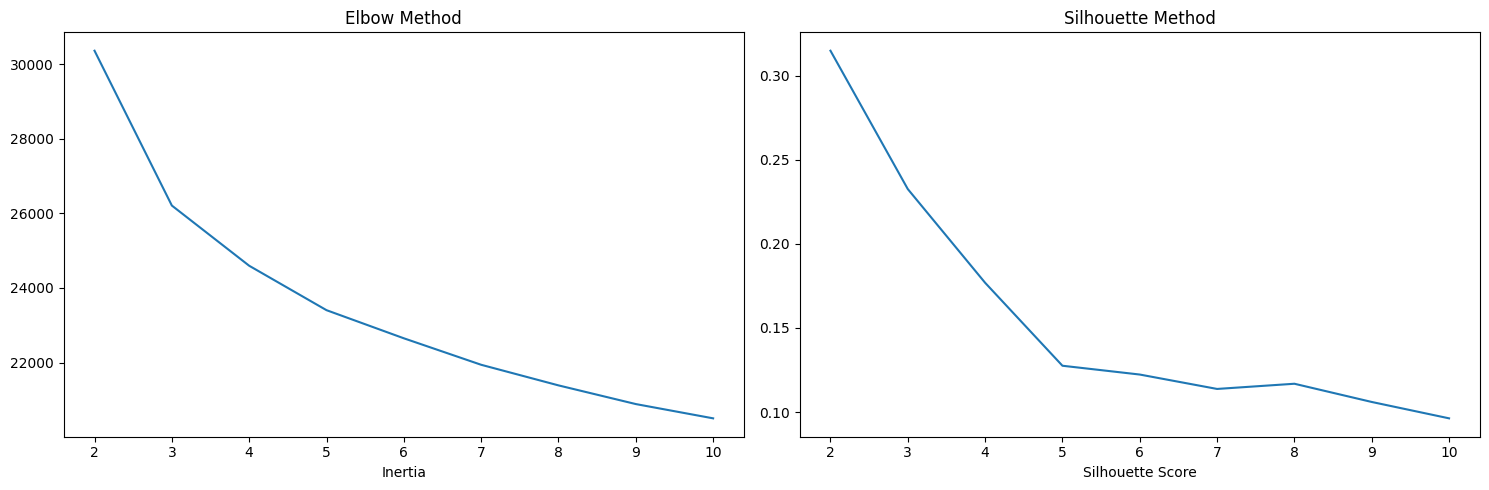

In [7]:
import Auxiliary_functions as af
af.plot_elbow_silhouette(base_scaled)

## Criando o pipeline e definindo o número de clusters.

In [8]:
#Realizando o processo de Pipeline
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
RANDOM_STATE=42
pipeline=Pipeline(
    [
        ('Preprocessing',preprocessing),
        ('PCA',PCA(n_components=2,random_state=RANDOM_STATE)),
        ('Clustering',KMeans(n_clusters=3,random_state=RANDOM_STATE, n_init=10))
    ]
)
pipeline.fit(base)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Income', 'Age']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'Age_Group', 'Kidhome',
                                                   'Teenhome', 'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'Accepted_Cmp_Total',
                                                   'Has_Accepted_Cmp',
                                                   'Complain', 'Response',
                                                   'Years_Since...
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'Mnt_Total', 'Mnt_Reg',
                                                   'Num_Total_Purchases']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Days_Since_Enrolled',
                                                   'Recency'])])),
                ('PCA', PCA(n_components=2, random_state=42)),
                ('Clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [9]:
#Visualiação das etapas
pipeline.named_steps

{'Preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('onehot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'Age_Group',
                                   'Kidhome', 'Teenhome', 'AcceptedCmp1',
                                   'AcceptedCmp2', 'AcceptedCmp3',
                                   'AcceptedCmp4', 'AcceptedCmp5',
                                   'Accepted_Cmp_Total', 'Has_Accepted_Cmp',
                                   'Complain', 'Response',
                                   'Years_Since_Enrolled', 'Children',
                                   'Has_Children']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                                   'MntFishProducts', 'MntSweetProducts',
                                   'MntGo

In [10]:
#Criar o Dataframe com cluster.
base_clustered=base.copy()
base_clustered['Cluster']=pipeline['Clustering'].labels_
base_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Age_Group,Mnt_Total,Mnt_Reg,Children,Has_Children,Accepted_Cmp_Total,Has_Accepted_Cmp,Num_Total_Purchases,Cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [11]:
#Verificando a quatidade de pontos por cluster
base_clustered['Cluster'].value_counts().sort_index()

Cluster
0    600
1    890
2    715
Name: count, dtype: int64

### No processo de transformação do PCA, percebi que houve uma mudança nos clusters, então será necessário replicar alguns gráficos do notebook anterior.

## Visualizando os dados clusterizados

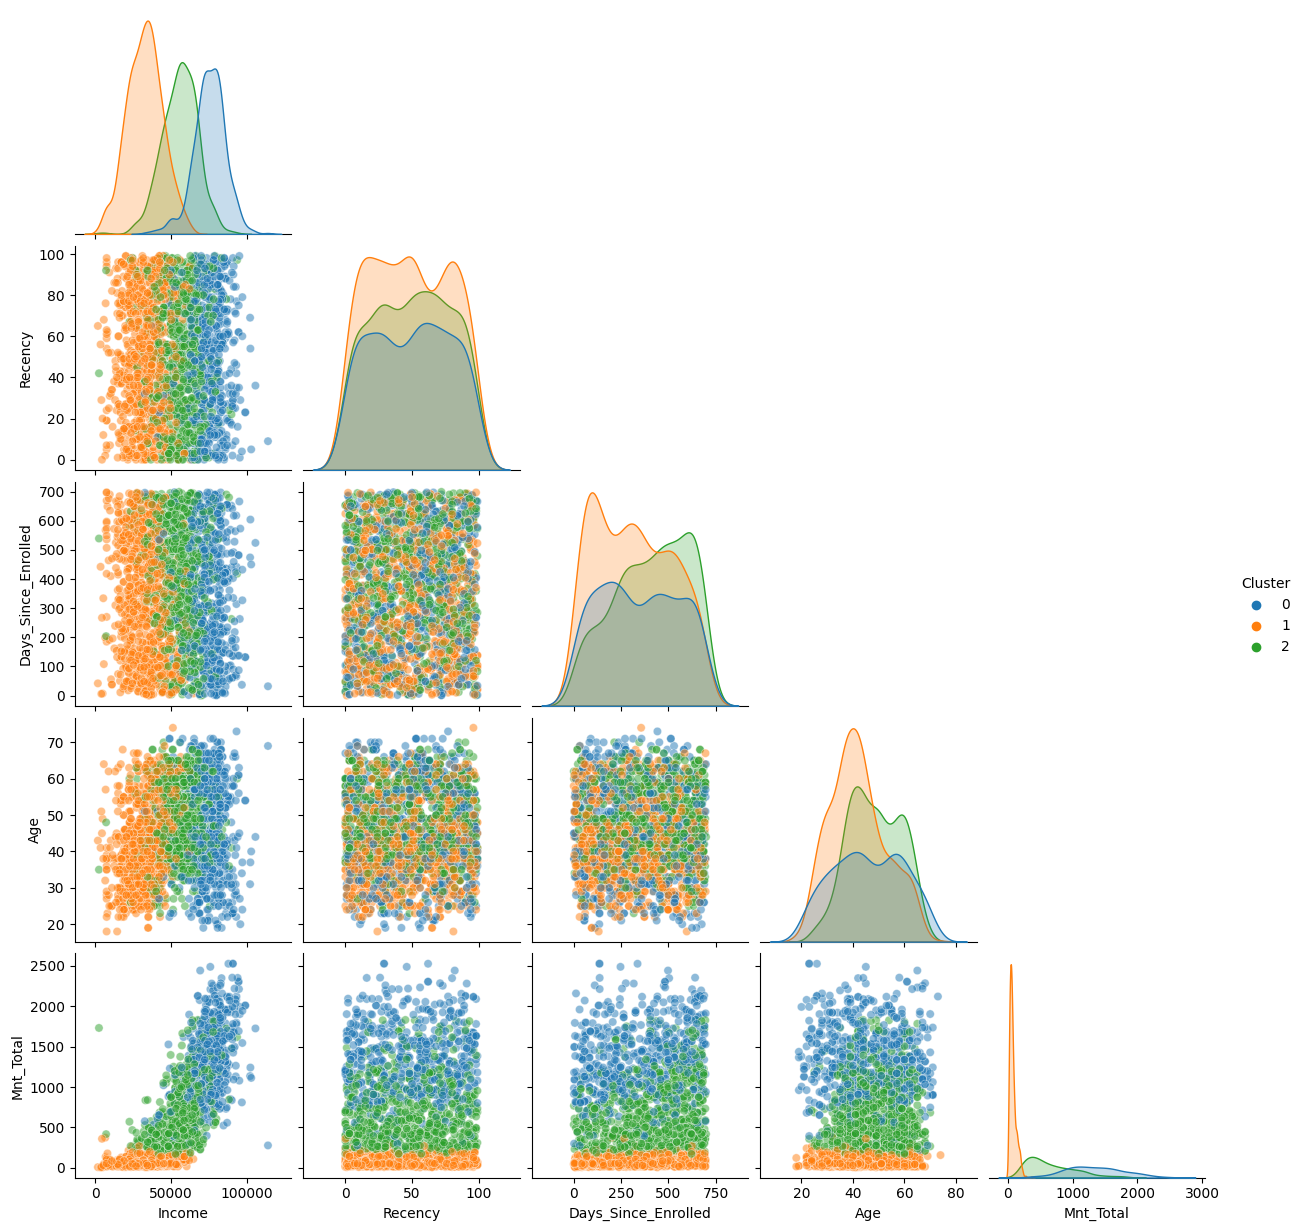

In [12]:
#Visualizando os graficos para encontrar os clusters.
Col_analysis =[
    'Income',
    'Recency',
    'Days_Since_Enrolled',
    'Age',
    'Mnt_Total'
]
af.pairplot(base_clustered,Col_analysis,hue_column='Cluster')

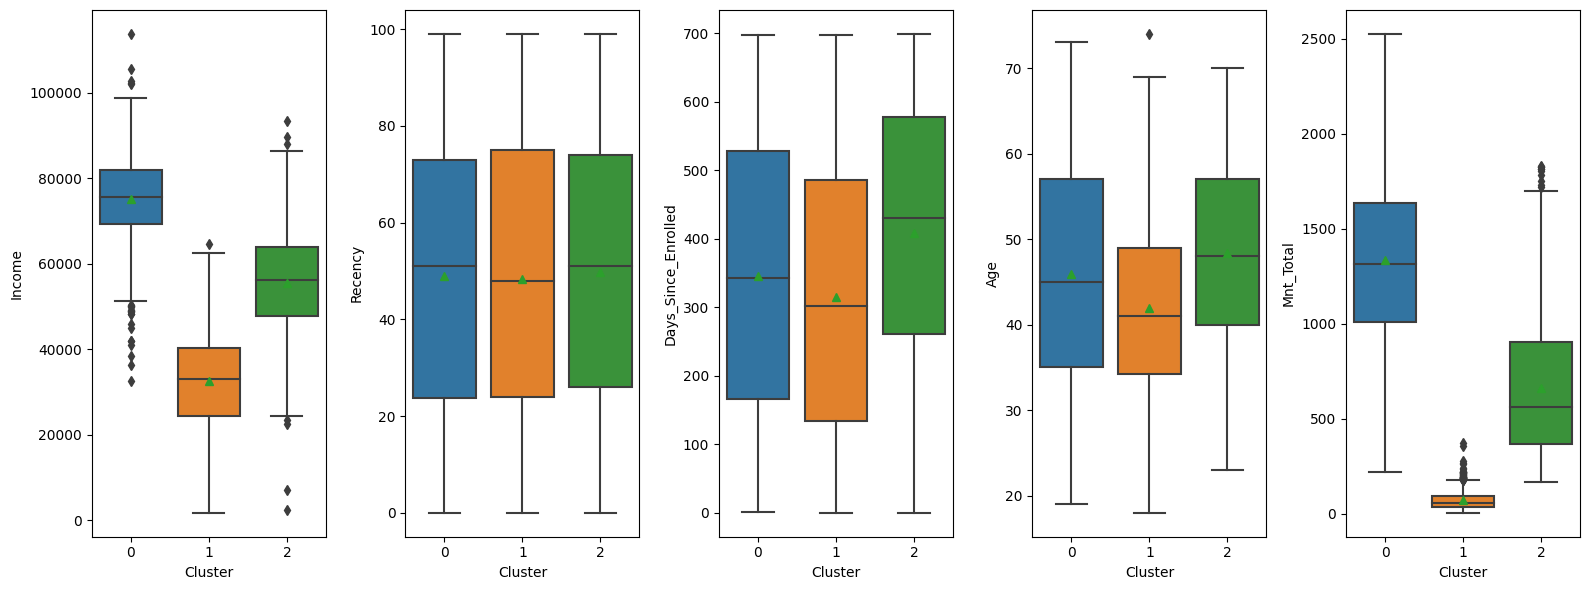

In [13]:
#Plotando os Clusters

fig, axs = plt.subplots(ncols= 5,figsize=(16,6),tight_layout=True)
for ax, col in zip(axs,Col_analysis):
    sns.boxplot(data=base_clustered,x="Cluster",y=col, ax=ax,showmeans=True)
plt.show()

In [14]:
#Verificando outras colunas para segregar os clusters
columns =[
    'Has_Children',
    'Marital_Status',
    'Has_Accepted_Cmp',
    'Education',
    'Response',
    'Years_Since_Enrolled',
]
cluster_diff_cols=[
    'Mnt_Total',
    'Income'
]

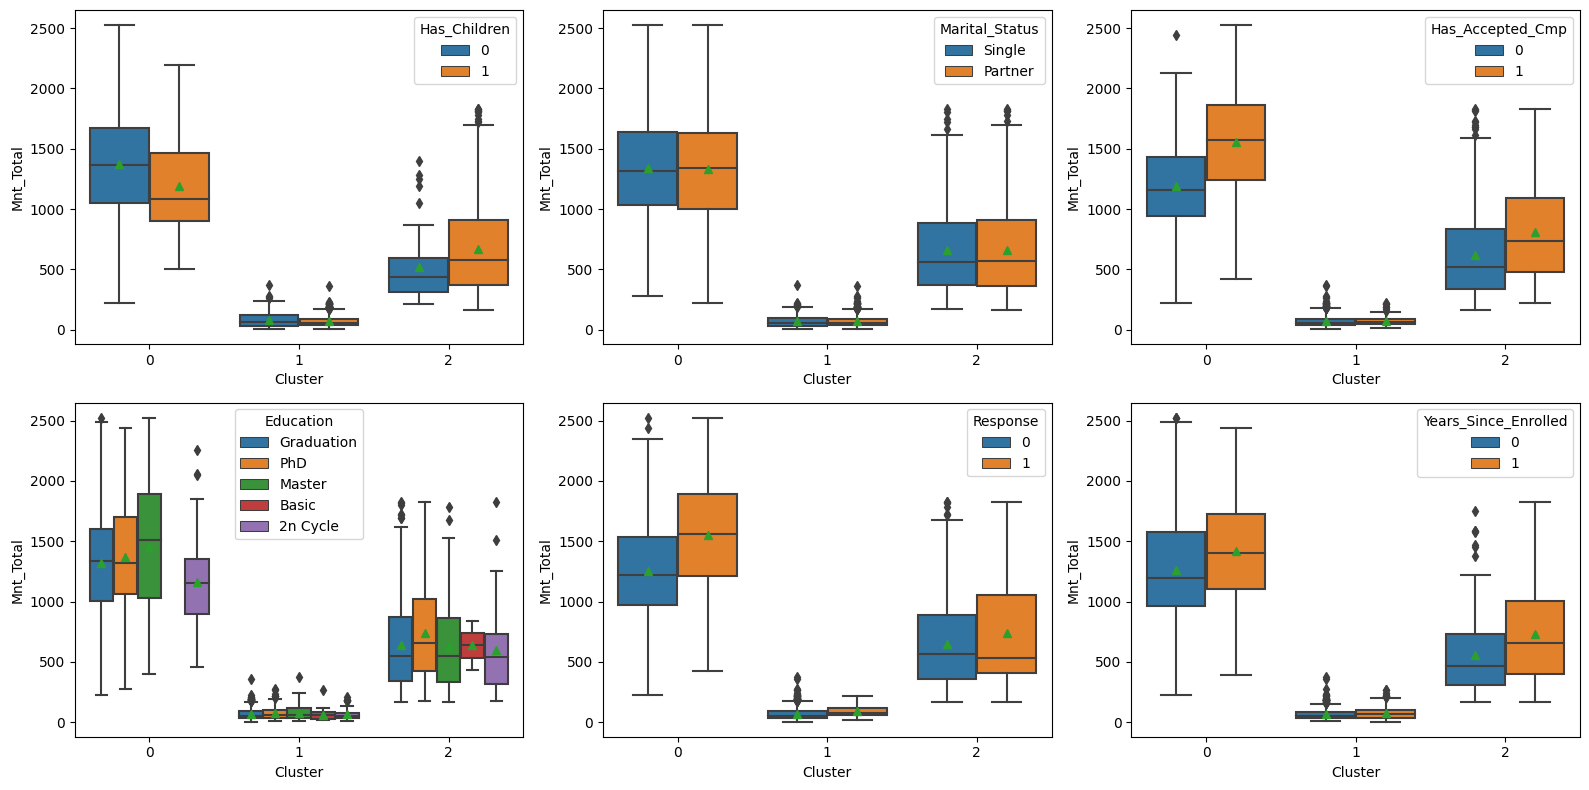

In [15]:
#Plotando os Clusters - Mnt_Total
fig, axs = plt.subplots(nrows=2,ncols= 3,figsize=(16,8),tight_layout=True)
for ax, col in zip(axs.flatten(),columns):
    sns.boxplot(data=base_clustered,x="Cluster",y=cluster_diff_cols[0], ax=ax,showmeans=True,hue=col)
plt.show()

## Visualizando os dados para rotular os clusters

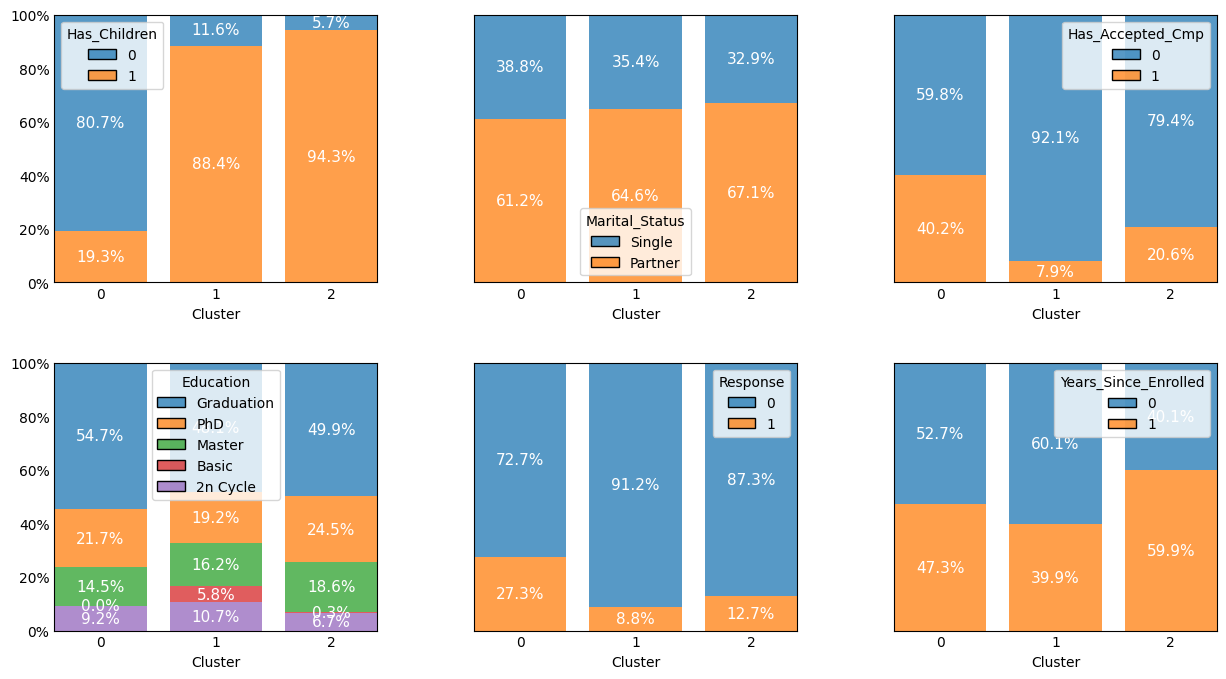

In [16]:
#Verificando as caracteristicas de cada cluster percentualmente em um gráfico personalizado no Auxiliary_Functions
af.plot_columns_percent_cluster(base_clustered,columns)

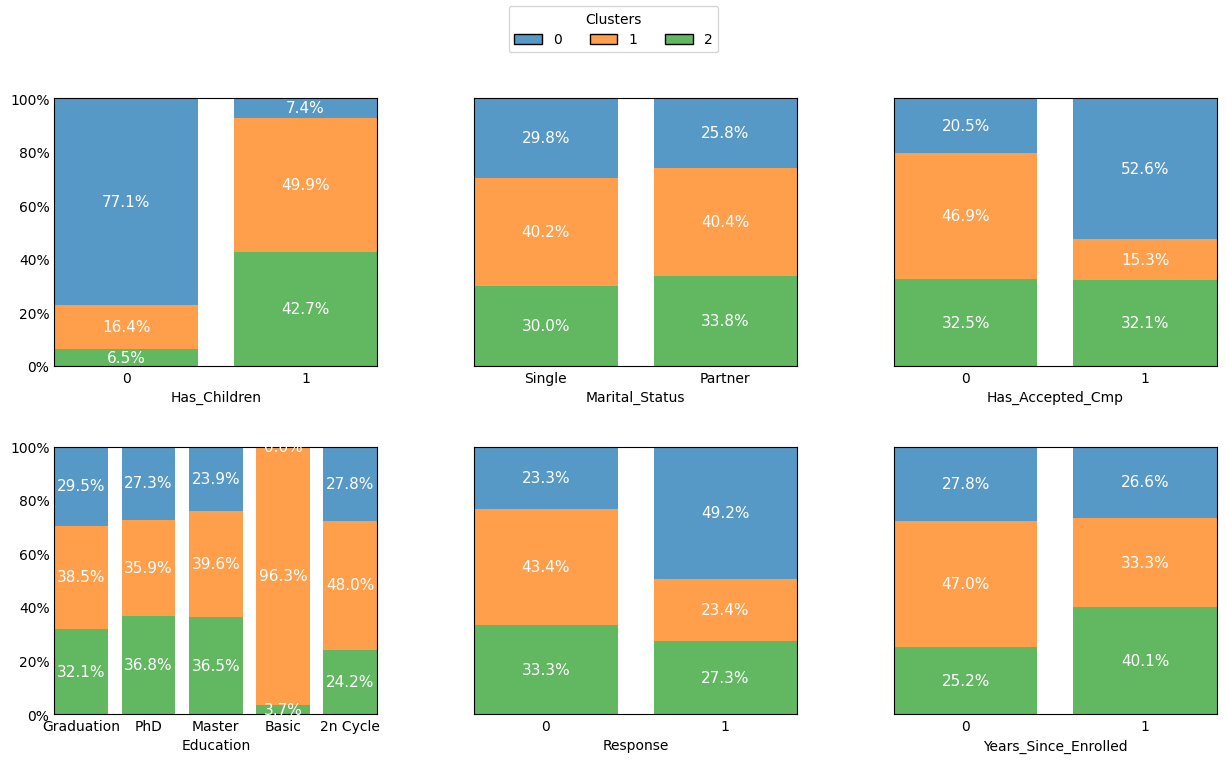

In [17]:
#Verificando as caracteristicas de cada cluster percentualmente em um gráfico personalizado no Auxiliary_Functions
af.plot_columns_percent_hue_cluster(base_clustered,columns)

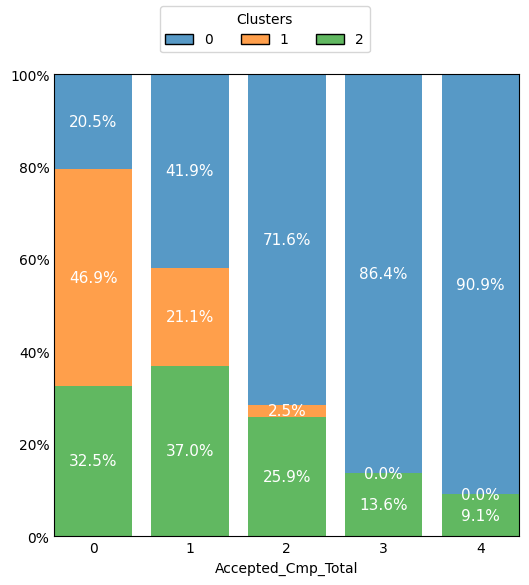

In [18]:
#Verificando as caracteristicas de cada cluster percentualmente na aceitação das campanhas com um gráfico personalizado no Auxiliary_Functions
af.plot_columns_percent_hue_cluster(base_clustered,['Accepted_Cmp_Total'],row_cols=(1,1),figsize=(6,6))

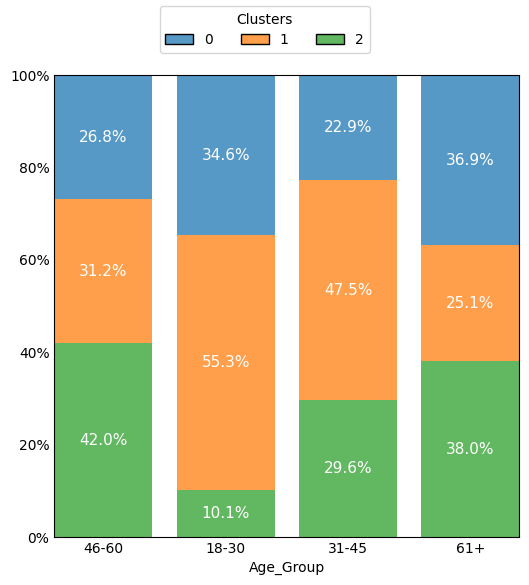

In [19]:
af.plot_columns_percent_hue_cluster(base_clustered,['Age_Group'],row_cols=(1,1),figsize=(6,6))

## Rótulos dos Clusters

### Resume Clusters:
#### Verificamos que a alteração foi entre os cluster 1 e 2, já alterados nas informações abaixo.
- **Cluster 0**: 
  - Renda intermediária
  - Gasto intermediário
  - Provalmente tem filhos
  - Pode aceitar campanhas
  - Pessoas com idade mais elevada
  
- **Cluster 1**: 
  - Renda baixa 
  - Gasto baixo 
  - Provalmente tem filhos
  - Baixa propensão a aceitar campanhas
  - Único cluster com porcentagem significativa de pessoas com escolaridade básica
  - Pessoas mais jovens

- **Cluster 2**: 
  - Renda alta 
  - Gasto alto 
  - Muito provalmente não tem filhos
  - Mais propenso a aceitar campanhas
  - Cluster sem pessoas com escolaridade básica
  - Sem um perfil de idade que se destaque
  



Has_Children | Income | Age | Education | Accepted_Cmp_Total | Mnt_Total | Cluster
--- | --- | --- | --- | --- | --- | ---
High | Moderate | High | Moderate | Moderate | Moderate | 0 
High | Low | Low | Low | Low | Low | 1
Low | High | Moderate | High | High | High | 2


# Pipeline

In [20]:
#Verificando o nome das colunas
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [21]:
#Criando o dataframe pipeline
base_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(base),
    columns=pipeline[:-1].get_feature_names_out(),
)
base_pca.head()

,pca0,pca1
0,-4.123249,0.543169
1,3.911560,-0.014418
2,-3.097421,-0.905988
3,3.293046,-0.813208
4,-0.960644,0.395305


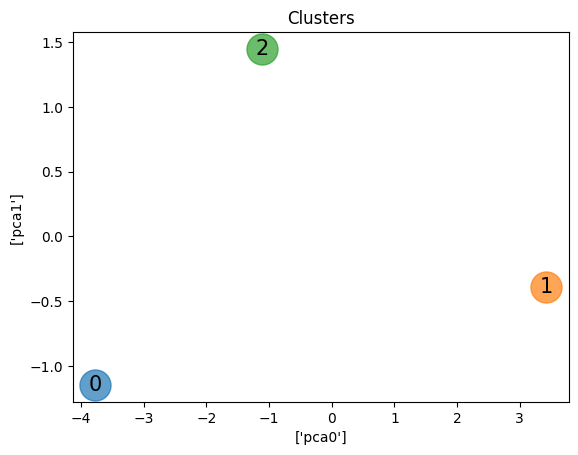

In [22]:
#Mostrando graficamento os Centroides
centroids=pipeline['Clustering'].cluster_centers_

af.plot_cluster(dataframe=base_pca,columns=base_pca.columns,n_colors=3,centroids=centroids)

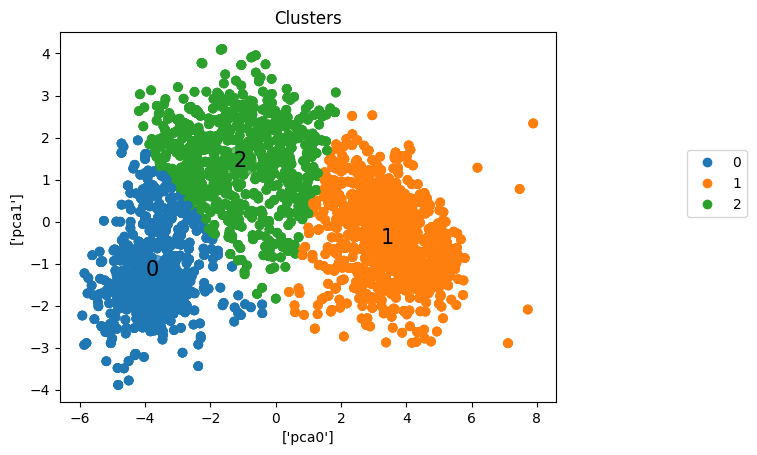

In [23]:
#Mostrando graficamento os todos os pontos.
centroids=pipeline['Clustering'].cluster_centers_

af.plot_cluster(dataframe=base_pca,columns=base_pca.columns,n_colors=3,centroids=centroids, show_points=True, column_clusters=base_clustered['Cluster'])

In [24]:
base_clustered.to_csv('../data/customer_clustered.csv', index=False)